In [53]:
import urllib
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
url = "https://www.tripadvisor.in/Hotels"
resp = urllib.request.urlopen(url)
soup = BeautifulSoup(resp, from_encoding=resp.info().get_param('charset'))
url_links_list = []
for link in soup.find_all(lambda tag: tag.name == 'a' and 
                               tag.get('class') == ['ui_link']):
    url_links_list.append(url+link['href'])

In [17]:
url_links_list2 =['https://www.tripadvisor.in/Hotels-g644043-Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh-Hotels.html']


In [46]:
hotel_names = []
hotel_prices= []
hotel_ratings=[]
hotel_no_rating =[]
hotel_location =[]
out_file = "/home/ram/OUTPUT/web_scrap.csv"

In [45]:
try:
    for loc_url in url_links_list:
        print(loc_url)
        loc_html = urllib.request.urlopen(loc_url)
        soup_location = BeautifulSoup(loc_html, from_encoding=resp.info().get_param('charset'))

        for hotels in soup_location.find_all('div',class_ = 'prw_rup prw_meta_hsx_responsive_listing ui_section listItem'):
    #     for hotels in soup_location.find_all('div',class_ = 'main-cols'):
            hotel_location_str = str(loc_url).split("-")[2].split('\.')[0]
            hotel_location.append(hotel_location_str)
    #         print(hotels.find('div', class_='ZVAUHZqh'))
            hotels = hotels.find('div', class_='ui_column is-8 main_col allowEllipsis')
#             print(hotels.div.text) # hotel name
            hotel_names.append(hotels.div.text)
            try:
#                 print(str(hotels.find('div',class_='premium_offer_container').div.div.div.text)
                      .split("₹")[1].replace(',',"")[1:]) # price
                hotel_prices.append(str((hotels.find('div',class_='premium_offer_container').div.div.div.text)).
                                    split("₹")[1].replace(',',"")[1:]) # price
            except:
                hotel_prices.append(np.nan)
            try:
#                 print(hotels.find('div', class_='info-col').div.a['alt'])#raitng
                hotel_ratings.append(str(hotels.find('div', class_='info-col').div.a['alt']).split(" ")[0])
            except:
                hotel_ratings.append("3.5")
#             print(hotels.find('a', class_='review_count').text, "\n")# review count
            hotel_no_rating.append(str(hotels.find('a', class_='review_count').text).split(" ")[0].replace(",",""))
        time.sleep(2)
except:
    pass
        

df = pd.DataFrame(data={"Hotel Name": hotel_names, "Price": hotel_prices, "Rating": hotel_ratings,
                        "No of Ratings": hotel_no_rating, "Location":hotel_location})
df2 = df.dropna()
df2.to_csv(out_file, sep=',',index=False)

https://www.tripadvisor.in/Hotels/Hotels-g297683-Agra_Agra_District_Uttar_Pradesh-Hotels.html
ITC Mughal, Agra- a Luxury Collection Hotel 
8526
4.5 of 5 bubbles
5,823 reviews 

Hotel Taj Resorts 
4574
4 of 5 bubbles
2,646 reviews 

Taj Hotel & Convention Centre, Agra 
5600
4.5 of 5 bubbles
5,629 reviews 

Jaypee Palace Hotel & Convention Centre Agra 
8119
4 of 5 bubbles
3,089 reviews 

Sterling Agra 
2990
4.5 of 5 bubbles
1,021 reviews 

Courtyard Agra 
8512
4.5 of 5 bubbles
2,821 reviews 

DoubleTree by Hilton Hotel Agra 
4497
4.5 of 5 bubbles
2,035 reviews 

Hotel Clarks Shiraz 
6440
4 of 5 bubbles
1,912 reviews 

Parador, A Boutique Hotel 
2591
4.5 of 5 bubbles
283 reviews 

Radisson Hotel Agra 
5840
4.5 of 5 bubbles
1,840 reviews 

Howard Plaza The Fern Agra 
7504
4 of 5 bubbles
1,785 reviews 

Aman Homestay 
3302
669 reviews 

Hotel Atulyaa Taj 
3361
4 of 5 bubbles
989 reviews 

Tajview - IHCL SeleQtions 
7000
4 of 5 bubbles
2,500 reviews 

Ramada Plaza by Wyndham Agra 
5620
4.5 o

https://www.tripadvisor.in/Hotels/Hotels-g297628-Bengaluru_Bangalore_District_Karnataka-Hotels.html
Royal Orchid Central 
3951
4 of 5 bubbles
1,645 reviews 

The Monarch Luxur 
4510
4.5 of 5 bubbles
1,572 reviews 

Hotel Royal Orchid Regenta Bangalore 
8523
4 of 5 bubbles
1,555 reviews 

The Lalit Ashok 
8782
4.5 of 5 bubbles
1,914 reviews 

Welcomhotel Bengaluru 
9711
4.5 of 5 bubbles
1,734 reviews 

The Chancery Pavilion 
5320
4 of 5 bubbles
1,909 reviews 

ITC Windsor, Bengaluru - a Luxury Collection Hotel 
14574
5 of 5 bubbles
4,466 reviews 

The Oberoi, Bengaluru 
15891
5 of 5 bubbles
3,109 reviews 

The Park Bangalore 
10377
4 of 5 bubbles
1,828 reviews 

Shangri-La Hotel Bengaluru 
15635
4.5 of 5 bubbles
1,347 reviews 

Radisson Bengaluru City Center 
5594
4.5 of 5 bubbles
254 reviews 

Lemon Tree Premier, Ulsoor Lake, Bengaluru 
6313
4.5 of 5 bubbles
1,918 reviews 

Conrad Bengaluru 
11441
5 of 5 bubbles
1,023 reviews 

Palm Meadows Club 
8201
4 of 5 bubbles
320 reviews 

ibis 

https://www.tripadvisor.in/Hotels/Hotels-g297605-Candolim_Bardez_North_Goa_District_Goa-Hotels.html
SponsoredGolden Tulip Goa Candolim 
5320
4.5 of 5 bubbles
801 reviews 

Santana Beach Resort 
5868
4.5 of 5 bubbles
2,075 reviews 

Whispering Palms Beach Resort 
7839
4.5 of 5 bubbles
2,445 reviews 

Hyatt Centric Candolim Goa 
9440
4.5 of 5 bubbles
381 reviews 

Golden Tulip Goa Candolim 
5320
4.5 of 5 bubbles
801 reviews 

Lemon Tree Amarante Beach Resort, Goa 
6827
4.5 of 5 bubbles
2,558 reviews 

Radisson Goa Candolim 
5897
4 of 5 bubbles
972 reviews 

Fortune Acron Regina 
6584
4.5 of 5 bubbles
2,220 reviews 

Lemon Tree Hotel, Candolim, Goa 
6081
4.5 of 5 bubbles
270 reviews 

Seashell Suites and Villas 
10613
5 of 5 bubbles
312 reviews 

Acron Seaway Resort 
4352
5 of 5 bubbles
110 reviews 

Casablanca 
4340
4 of 5 bubbles
697 reviews 

Sonesta Inns Resort 
8955
4 of 5 bubbles
757 reviews 

EVOKE Lifestyle Candolim 
5073
4.5 of 5 bubbles
165 reviews 

Phoenix Park Inn Resort 
966

https://www.tripadvisor.in/Hotels/Hotels-g304557-Darjeeling_Darjeeling_District_West_Bengal-Hotels.html
Summit Swiss Heritage Hotel & Spa 
2363
4 of 5 bubbles
415 reviews 

Mayfair Darjeeling 
15340
4.5 of 5 bubbles
903 reviews 

Sinclairs Darjeeling 
4470
4 of 5 bubbles
635 reviews 

Udaan Dekeling Resort, Darjeeling 
3403
4.5 of 5 bubbles
628 reviews 

Treebo Trend Dekeling Hotel 
2799
4.5 of 5 bubbles
740 reviews 

Hotel Villa Everest 
2800
4.5 of 5 bubbles
235 reviews 

Tieedi Earthy Dwelling & Herb Garden Dwelling 
1361
119 reviews 

Magnolia Residency 
1959
167 reviews 

Summit Hermon Hotel & Spa 
4070
4 of 5 bubbles
216 reviews 

Singtom Tea Estate & Resort 
5552
4.5 of 5 bubbles
234 reviews 

Cedar Inn 
7652
4.5 of 5 bubbles
619 reviews 

Little Tibet Resort 
5096
4 of 5 bubbles
303 reviews 

Udaan Hotel Zambala Retreat 
6272
383 reviews 

Jai Hotel 
9440
4.5 of 5 bubbles
73 reviews 

Ging Tea House 
16668
4.5 of 5 bubbles
155 reviews 

Shangri-la Regency 
2734
4 of 5 bubbles
3

https://www.tripadvisor.in/Hotels/Hotels-g297604-Goa-Hotels.html
SponsoredFortune Miramar 
5876
4.5 of 5 bubbles
136 reviews 

Caravela Beach Resort 
8399
4.5 of 5 bubbles
4,406 reviews 

Royal Orchid Beach Resort & Spa, Goa 
7054
4.5 of 5 bubbles
2,257 reviews 

ibis Styles Goa Calangute Resort 
5472
4.5 of 5 bubbles
2,180 reviews 

Resort Rio 
6335
4.5 of 5 bubbles
2,625 reviews 

Whispering Palms Beach Resort 
7839
4.5 of 5 bubbles
2,445 reviews 

SponsoredThe Crown Goa 
6720
4 of 5 bubbles
450 reviews 

Goa Marriott Resort & Spa 
24655
4.5 of 5 bubbles
3,385 reviews 

Santana Beach Resort 
5868
4.5 of 5 bubbles
2,075 reviews 

Hyatt Centric Candolim Goa 
9440
4.5 of 5 bubbles
366 reviews 

ITC Grand Goa - A Luxury Collection Resort & Spa 
30090
4.5 of 5 bubbles
4,558 reviews 

Sterling Goa- Varca 
6935
5 of 5 bubbles
1,889 reviews 

Acron Waterfront Resort 
8064
5 of 5 bubbles
1,565 reviews 

Le Meridien Goa, Calangute 
16980
4.5 of 5 bubbles
767 reviews 

Lemon Tree Amarante Beach

https://www.tripadvisor.in/Hotels/Hotels-g297586-Hyderabad_Hyderabad_District_Telangana-Hotels.html
The Golkonda Hotel 
4056
4.5 of 5 bubbles
1,965 reviews 

The Manohar Hyderabad 
4984
4 of 5 bubbles
1,241 reviews 

The Park Hyderabad 
4433
4.5 of 5 bubbles
2,994 reviews 

Lemon Tree Premier, HITEC City 
5927
4.5 of 5 bubbles
2,462 reviews 

Leonia Holistic Destination 
4704
4.5 of 5 bubbles
2,071 reviews 

Marigold By Greenpark 
7000
4.5 of 5 bubbles
1,455 reviews 

Ellaa Hotel 
6160
4.5 of 5 bubbles
1,022 reviews 

Radisson Hyderabad Hitec City 
5867
4.5 of 5 bubbles
2,195 reviews 

Radisson Blu Plaza Hotel Hyderabad Banjara Hills 
5955
4.5 of 5 bubbles
2,190 reviews 

Siesta Hitech 
4928
4 of 5 bubbles
371 reviews 

ITC Kohenur, Hyderabad - a Luxury Collection Hotel 
14160
5 of 5 bubbles
1,590 reviews 

Lemon Tree Hotel, Gachibowli 
8130
4.5 of 5 bubbles
1,662 reviews 

Hyatt Place Hyderabad Banjara Hills 
6720
4.5 of 5 bubbles
289 reviews 

Hotel AVASA 
7139
4.5 of 5 bubbles
1,823

https://www.tripadvisor.in/Hotels/Hotels-g1232778-Kalpetta_Wayanad_District_Kerala-Hotels.html
LakeRose Wayanad Resort 
6756
5 of 5 bubbles
289 reviews 

Petals Resorts Wayanad 
7140
4.5 of 5 bubbles
252 reviews 

Green Gates 
3584
4 of 5 bubbles
245 reviews 

Pepper Green Village 
3172
280 reviews 

Hotel Indriya Wayanad 
3164
4 of 5 bubbles
153 reviews 

SponsoredLakeRose Wayanad Resort 
6756
5 of 5 bubbles
289 reviews 

Verdure Wayanad 
3465
93 reviews 

Olives Resort 
5599
369 reviews 

Sundara Mahal Homestay 
3629
126 reviews 

Himadri Retreat 
2000
136 reviews 

The Four Seasons Homestay Wayanad 
2218
199 reviews 

iCon Residency 
919
52 reviews 

Coffee acres Plantation Resort 
4791
120 reviews 

Wyndvalley Garden Resort 
2374
4 of 5 bubbles
47 reviews 

Haritagiri Hotel 
2375
3.5 of 5 bubbles
186 reviews 

KTDC Pepper Grove Hotel 
2240
126 reviews 

Glendale Holiday Homes Wayanad 
2477
8 reviews 

Rock Haven Wayanad 
3920
20 reviews 

Rippon Mount Resorts 
5065
4 of 5 bubbles
1

https://www.tripadvisor.in/Hotels/Hotels-g297647-Khajuraho_Chhatarpur_District_Madhya_Pradesh-Hotels.html
Ramada by Wyndham Khajuraho 
5040
4 of 5 bubbles
1,037 reviews 

Khajuraho Homestay 
480
46 reviews 

Hotel Marble Palace 
1098
4 of 5 bubbles
57 reviews 

Amar's Khajuraho Mansion 
1903
10 reviews 

The Highvill Home Stay 
450
22 reviews 

MPT Jhankar, Khajuraho 
2518
56 reviews 

Junkie House 
898
15 reviews 

The High Vill Home Stay 
550
5 reviews 

Shree Ram Tourist Home 
2046
9 reviews 

The Lalit Temple View Khajuraho 
4.5 of 5 bubbles
753 reviews 

Radisson Jass Hotel Khajuraho 
4 of 5 bubbles
1,106 reviews 

Hotel isabel Palace 
4.5 of 5 bubbles
692 reviews 

Syna Heritage Hotel - Khajuraho 
4.5 of 5 bubbles
171 reviews 

Hotel Harmony 
4 of 5 bubbles
564 reviews 

Zorba the Buddha 
67 reviews 

Headquarter Khajuraho 
169 reviews 

Clarks Khajuraho 
4 of 5 bubbles
547 reviews 

Hotel Ramayana 
82 reviews 

Hotel Khajuraho Temple View 
20 reviews 

EuroStar Inn 
4 of 5 bubbl

https://www.tripadvisor.in/Hotels/Hotels-g678552-Kumarakom_Kottayam_District_Kerala-Hotels.html
SponsoredPark Regis Aveda Kumarakom 
18001
5 of 5 bubbles
1,230 reviews 

Niraamaya Retreats Backwaters And Beyond, Kumarakom 
17136
5 of 5 bubbles
270 reviews 

The Zuri Kumarakom, Kerala Resort & Spa 
17051
4.5 of 5 bubbles
1,750 reviews 

Kumarakom Lake Resort 
25585
4.5 of 5 bubbles
2,359 reviews 

Park Regis Aveda Kumarakom 
18001
5 of 5 bubbles
1,230 reviews 

Lakesong Kumarakom 
6999
4 of 5 bubbles
1,007 reviews 

Backwater Ripples 
7345
4 of 5 bubbles
814 reviews 

Taj Kumarakom Resort and Spa 
14031
4.5 of 5 bubbles
1,539 reviews 

Illikkalam Lakeside Cottages 
1568
4 of 5 bubbles
295 reviews 

Cocobay Resort 
5606
4 of 5 bubbles
388 reviews 

Backwater Brook Resort 
4424
5 of 5 bubbles
33 reviews 

Coconut Lagoon 
24573
4.5 of 5 bubbles
1,581 reviews 

Paradise Resorts 
4238
4 of 5 bubbles
225 reviews 

Backwater Heritage Homestay 
2400
297 reviews 

Lake Palace Family Resort 
1000

https://www.tripadvisor.in/Hotels/Hotels-g635749-Mahabaleshwar_Satara_District_Maharashtra-Hotels.html
SponsoredBella Vista Resort 
6610
4.5 of 5 bubbles
1,665 reviews 

Evershine Resort 
6256
4.5 of 5 bubbles
1,920 reviews 

Bella Vista Resort 
6610
4.5 of 5 bubbles
1,665 reviews 

Ramsukh Resorts & Spa 
8332
4.5 of 5 bubbles
608 reviews 

Le Meridien Mahabaleshwar Resort & Spa 
13807
4.5 of 5 bubbles
1,056 reviews 

Citrus Chambers Mahabaleshwar 
7661
4.5 of 5 bubbles
1,030 reviews 

Mango Hotels Valley View 
3604
4 of 5 bubbles
377 reviews 

The Grand Legacy 
4189
4 of 5 bubbles
449 reviews 

Brightland Resort & Spa 
10715
4.5 of 5 bubbles
709 reviews 

Forest County Resort 
5600
4 of 5 bubbles
61 reviews 

West Hill 
3573
4.5 of 5 bubbles
408 reviews 

Treebo Trend Winter Town 
1455
4 of 5 bubbles
69 reviews 

Advait Valley Camp, Kshetra Mahabaleshwar 
3410
34 reviews 

Treebo Trend Hillway Inn 
2538
66 reviews 

Rajesh 
3808
3.5 of 5 bubbles
218 reviews 

Hotel Dreamland 
4947
4 o

https://www.tripadvisor.in/Hotels/Hotels-g679012-Mount_Abu_Sirohi_District_Rajasthan-Hotels.html
Chacha Inn 
4726
4.5 of 5 bubbles
479 reviews 

The Jaipur House 
3466
3.5 of 5 bubbles
264 reviews 

Hotel Savera Palace 
3584
4 of 5 bubbles
73 reviews 

Hotel Silver Oak 
4.5 of 5 bubbles
1,120 reviews 

Hotel Hillock 
4.5 of 5 bubbles
885 reviews 

Hotel Toppers Corner 
4.5 of 5 bubbles
464 reviews 

Hotel Ashoka 
4.5 of 5 bubbles
595 reviews 

Hotel Mount Regency 
4 of 5 bubbles
265 reviews 

Hotel Sudhir 
191 reviews 

Hotel Hilltone 
4 of 5 bubbles
575 reviews 

Sterling Mount Abu 
4.5 of 5 bubbles
261 reviews 

Palace Hotel 
226 reviews 

WelcomHeritage Connaught House Mount Abu 
4.5 of 5 bubbles
300 reviews 

Hotel Sheratone Mount Abu 
4.5 of 5 bubbles
150 reviews 

Hotel Vinayak 
4.5 of 5 bubbles
208 reviews 

Ratan Villas 
4.5 of 5 bubbles
1,028 reviews 

Forest Eco Lodge 
109 reviews 

Cama Rajputana Club Resort 
4 of 5 bubbles
188 reviews 

Hotel Royal Heritage 
99 reviews 

Ho

https://www.tripadvisor.in/Hotels/Hotels-g662323-Nagpur_Nagpur_District_Maharashtra-Hotels.html
The Pride Hotel Nagpur 
9181
4 of 5 bubbles
865 reviews 

OYO 5408 Loharkar's Family Hotel 
6563
3.5 of 5 bubbles
20 reviews 

Hotel Yatri 
2979
4 of 5 bubbles
12 reviews 

Hotel Status 
764
3 reviews 

Hotel Chanakya 
1568
6 reviews 

Hotel The Nagpur Ashok 
4.5 of 5 bubbles
856 reviews 

Radisson Blu Hotel Nagpur 
4.5 of 5 bubbles
1,750 reviews 

Le Meridien Nagpur 
4.5 of 5 bubbles
778 reviews 

Treebo Trend Chalets 
4.5 of 5 bubbles
40 reviews 

Urban Hermitage 
4.5 of 5 bubbles
168 reviews 

Hotel Centre Point 
4 of 5 bubbles
389 reviews 

Regenta Central Hotel & Convention Centre, Nagpur India 
5 of 5 bubbles
122 reviews 

Hotel Legend Inn 
4 of 5 bubbles
216 reviews 

Tuli Imperial 
4 of 5 bubbles
337 reviews 

Hotel Hardeo 
3.5 of 5 bubbles
114 reviews 

Hotel Amrta (Renovated) 
3.5 of 5 bubbles
24 reviews 

Mango Hotels Nagpur, Central Avenue Road 
4 of 5 bubbles
300 reviews 

The M

https://www.tripadvisor.in/Hotels/Hotels-g297679-Ooty_Udhagamandalam_The_Nilgiris_District_Tamil_Nadu-Hotels.html
Sterling Ooty Elk Hill 
3903
4.5 of 5 bubbles
1,779 reviews 

Sterling Ooty Fern Hill 
4346
4 of 5 bubbles
2,159 reviews 

Sinclairs Retreat Ooty 
5307
4 of 5 bubbles
1,135 reviews 

Mount 'n' Mist 
2018
920 reviews 

Destiny The Farm Resort 
11505
1,039 reviews 

Delightz Inn 
4633
732 reviews 

La Flora Amberley Resort 
1368
4 of 5 bubbles
830 reviews 

Hotel Lakeview 
2105
3.5 of 5 bubbles
915 reviews 

Tulips Elkhill Resorts 
1108
145 reviews 

Fortune Retreats Resorts - Ooty 
2240
166 reviews 

Zostel Ooty 
2799
128 reviews 

Woodberry Residency 
1296
4.5 of 5 bubbles
597 reviews 

Global Village Ooty 
3769
4.5 of 5 bubbles
262 reviews 

Accord Highland Hotel Ooty 
14760
4.5 of 5 bubbles
1,580 reviews 

Meadows Residency - Ooty 
4.5 of 5 bubbles
1,380 reviews 

Treebo Trend Yantra Leisures 
4 of 5 bubbles
475 reviews 

Fairstay Holiday Resort 
4 of 5 bubbles
581 review

https://www.tripadvisor.in/Hotels/Hotels-g503703-Puri_Puri_District_Odisha-Hotels.html
Sterling Puri 
5983
4 of 5 bubbles
628 reviews 

Toshali Sands 
4469
4 of 5 bubbles
895 reviews 

Sagar Tarang Residency 
2304
3 of 5 bubbles
41 reviews 

Golden Tree 
5 of 5 bubbles
393 reviews 

Pride Ananya Resort 
4 of 5 bubbles
255 reviews 

Hotel Gandhara 
4.5 of 5 bubbles
280 reviews 

Pramod Convention & Beach Resort 
4.5 of 5 bubbles
907 reviews 

OYO 5791 Mahabir Sheraton 
4.5 of 5 bubbles
190 reviews 

Jamindar's Palace 
249 reviews 

Puri Beach Resort 
119 reviews 

Hotel Sonar Bangla 
3.5 of 5 bubbles
247 reviews 

Chanakya BNR Hotel 
4 of 5 bubbles
263 reviews 

Reba Beach Resort 
291 reviews 

Mahodadhi Palace 
3.5 of 5 bubbles
239 reviews 

Hotel Dolphin 
12 reviews 

Hotel Santana 
3.5 of 5 bubbles
54 reviews 

Hotel Holiday Resort 
4 of 5 bubbles
1,008 reviews 

Mayfair Heritage 
4.5 of 5 bubbles
616 reviews 

MAYFAIR Waves 
4.5 of 5 bubbles
346 reviews 

The Hans Coco Palms 
4 of 5

https://www.tripadvisor.in/Hotels/Hotels-g304552-Shimla_Shimla_District_Himachal_Pradesh-Hotels.html
SponsoredClarkes Hotel 
8120
4.5 of 5 bubbles
830 reviews 

Summit Le Royale Hotel 
11151
4.5 of 5 bubbles
334 reviews 

Amritara The Zion 
5026
5 of 5 bubbles
171 reviews 

Snow Valley Resorts Shimla 
4918
4.5 of 5 bubbles
638 reviews 

Hotel Willow Banks 
9383
4 of 5 bubbles
647 reviews 

Clarkes Hotel 
8120
4.5 of 5 bubbles
830 reviews 

Radisson Hotel Shimla 
6460
4 of 5 bubbles
1,327 reviews 

Fortune Select Cedar Trail 
9063
5 of 5 bubbles
58 reviews 

Hotel Silverine 
2744
4 of 5 bubbles
743 reviews 

Marigold Sarovar Portico 
3973
4.5 of 5 bubbles
487 reviews 

Silicon Inn Shimla 
1758
603 reviews 

Hotel Marina 
9558
4 of 5 bubbles
343 reviews 

Hotel Baljees Regency 
3844
4.5 of 5 bubbles
400 reviews 

Shimla British Resort 
2330
4 of 5 bubbles
177 reviews 

Koti Resort 
5376
4 of 5 bubbles
287 reviews 

Ashiana Clarks Inn 
3360
4 of 5 bubbles
247 reviews 

HPTDC Hotel Holiday

https://www.tripadvisor.in/Hotels/Hotels-g297636-Thekkady_Idukki_District_Kerala-Hotels.html
Forest Canopy 
6483
5 of 5 bubbles
1,231 reviews 

Poetree Sarovar Portico 
9813
5 of 5 bubbles
2,320 reviews 

The Elephant Court 
8054
4.5 of 5 bubbles
1,445 reviews 

Sterling Thekkady 
4150
4.5 of 5 bubbles
103 reviews 

Oxygen Resorts Thekkady 
4256
5 of 5 bubbles
263 reviews 

Peppervine Hotel 
4781
4.5 of 5 bubbles
1,049 reviews 

ABAD Green Forest Resort 
6160
4.5 of 5 bubbles
830 reviews 

The Mountain Courtyard 
9163
5 of 5 bubbles
1,430 reviews 

Amaana Plantation Resort 
7248
5 of 5 bubbles
379 reviews 

Summit Hampton Hotel & Spa 
3277
4.5 of 5 bubbles
197 reviews 

Niraamaya Retreats Cardamom Club - Thekkady 
7345
5 of 5 bubbles
670 reviews 

Spice Village 
12099
4.5 of 5 bubbles
1,175 reviews 

Chrissie's Hotel 
3046
4.5 of 5 bubbles
395 reviews 

Monsoon Retreats Eco-Stay 
3024
136 reviews 

Cardamom County 
8579
4.5 of 5 bubbles
1,230 reviews 

Greenwoods Resort 
10897
4.5 of 5

https://www.tripadvisor.in/Hotels/Hotels-g297685-Varanasi_Varanasi_District_Uttar_Pradesh-Hotels.html
Ganpati Guest House 
5039
4.5 of 5 bubbles
2,549 reviews 

Hotel Varanasi Inn 
3517
4.5 of 5 bubbles
231 reviews 

Brijrama Palace 
30709
5 of 5 bubbles
761 reviews 

Hotel Heritage Inn 
4717
4 of 5 bubbles
808 reviews 

Ramada Plaza by Wyndham JHV Varanasi 
8399
4 of 5 bubbles
1,585 reviews 

Hotel Buddha 
2867
4 of 5 bubbles
704 reviews 

Dwivedi Hotels Sri Omkar Palace 
5645
171 reviews 

Rahul Guest House 
1000
310 reviews 

Hotel Rivera Palace 
2288
4.5 of 5 bubbles
303 reviews 

Somit Paying Guest House 
1568
660 reviews 

Homestay 
2800
627 reviews 

Radisson Hotel Varanasi 
10225
4 of 5 bubbles
2,086 reviews 

Amritara Suryauday Haveli 
16106
4.5 of 5 bubbles
762 reviews 

Taj Ganges, Varanasi 
11966
4 of 5 bubbles
2,058 reviews 

Granny's Inn 
3530
283 reviews 

Zostel Varanasi 
1342
1,119 reviews 

Banaras Paying Guest house 
2449
200 reviews 

Bliss Hostel 
839
122 reviews 


https://www.tripadvisor.in/Hotels/Hotels-g295424-Dubai_Emirate_of_Dubai-Hotels.html
SponsoredInterContinental Residence Suites Dubai Festival City 
9964
210 reviews 

Atlantis, The Palm 
33163
4.5 of 5 bubbles
27,614 reviews 

FIVE Palm Jumeirah Dubai 
23874
5 of 5 bubbles
7,829 reviews 

Roda Al Murooj 
8794
4.5 of 5 bubbles
5,117 reviews 

Anantara The Palm Dubai Resort 
15774
4.5 of 5 bubbles
7,598 reviews 

Premier Inn Dubai International Airport Hotel 
4750
4.5 of 5 bubbles
5,662 reviews 

Dubai International Hotel 
17355
8,299 reviews 

Hyatt Regency Dubai Creek Heights 
16624
4.5 of 5 bubbles
7,243 reviews 

TRYP by Wyndham Dubai 
5854
4.5 of 5 bubbles
2,469 reviews 

Fairmont The Palm 
20186
4.5 of 5 bubbles
6,808 reviews 

JW Marriott Marquis Hotel Dubai 
18062
4.5 of 5 bubbles
10,287 reviews 

Hyatt Regency Dubai 
31454
4.5 of 5 bubbles
4,983 reviews 

Shangri-La Hotel, Dubai 
17100
5 of 5 bubbles
2,187 reviews 

Citymax Hotel Bur Dubai 
3748
4 of 5 bubbles
4,231 reviews 

Gr

https://www.tripadvisor.in/Hotels/Hotels-g294265-Singapore-Hotels.html
SponsoredPan Pacific Singapore 
19454
4.5 of 5 bubbles
10,558 reviews 

Marina Bay Sands 
64615
4.5 of 5 bubbles
28,849 reviews 

YOTEL Singapore 
10033
4.5 of 5 bubbles
3,007 reviews 

Pan Pacific Singapore 
19454
4.5 of 5 bubbles
10,558 reviews 

Grand Copthorne Waterfront Hotel 
15448
4 of 5 bubbles
4,578 reviews 

Hotel Boss 
7608
4 of 5 bubbles
3,793 reviews 

SponsoredPARKROYAL on Beach Road 
14185
4 of 5 bubbles
3,495 reviews 

Swissotel The Stamford Singapore 
20313
4 of 5 bubbles
10,073 reviews 

Mandarin Orchard Singapore 
16953
4 of 5 bubbles
11,927 reviews 

PARKROYAL on Kitchener Road 
10678
4 of 5 bubbles
5,072 reviews 

V Hotel Lavender 
7918
3.5 of 5 bubbles
4,853 reviews 

Hotel Jen Orchardgateway Singapore by Shangri-La 
15256
4.5 of 5 bubbles
2,881 reviews 

Hotel G Singapore 
6477
4 of 5 bubbles
3,414 reviews 

Park Hotel Alexandra 
10848
4.5 of 5 bubbles
2,535 reviews 

Park Hotel Clarke Quay 
1

In [50]:
input_data = pd.read_csv(out_file)
input_data.head()


,Hotel Name,Price,Rating,No of Ratings,Location
0,SponsoredHotel P.K. Residency,2784,4.0,122,Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh
1,"Sandal Suites, operated by Lemon Tree Hotels",8322,5.0,530,Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh
2,Radisson Blu Hotel Noida,9027,4.5,1663,Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh
3,Radisson Noida,7559,4.5,842,Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh
4,Mosaic Boutique Hotel,6719,4.0,316,Noida_Gautam_Buddha_Nagar_District_Uttar_Pradesh


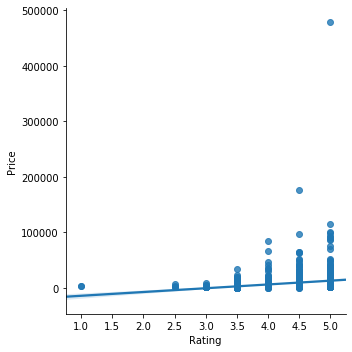

In [57]:
sns.lmplot(x ='Rating', y = 'Price', data=input_data)

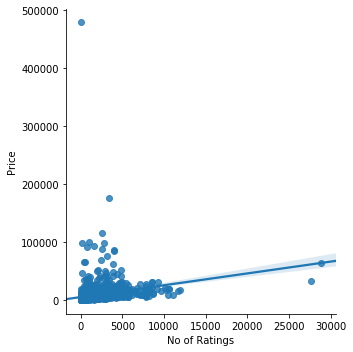

In [58]:
sns.lmplot(x ='No of Ratings', y = 'Price', data=input_data)

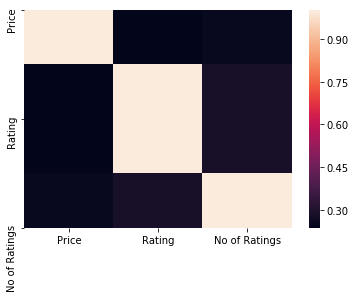

In [56]:
sns.heatmap(input_data.corr())

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
X = input_data[['Rating','No of Ratings']]
Y = input_data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [77]:
lm = LinearRegression()

In [78]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

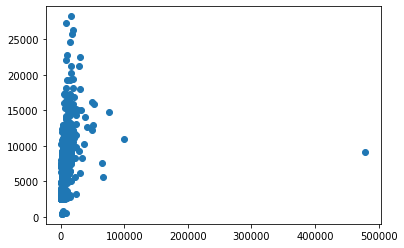

In [79]:
predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)

In [80]:
from sklearn import metrics

In [87]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Squared Error: 319947298.9310336
RMSE: 17887.07071968559


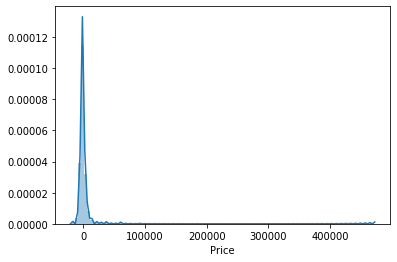

In [86]:
sns.distplot((Y_test-predictions),bins=100);